### KinOrtho ortholog comparison plots

In [3]:
cd ~/Dropbox/kannan_lab/projects/kinview_Orthologs/KinOrtho_QfO2011_200403

/Users/rtaujale/Dropbox (Edison_Lab@UGA)/kannan_lab/projects/kinview_Orthologs/KinOrtho_QfO2011_200403


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import math

In [11]:
df=pd.read_csv('comparison_summary',sep=' ',header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Broccoli1,0.955095,0.687105,0.779726,0.941105,0.753536,0.822174,0.954220,0.777045,0.841160,0.021683,0.046251,0.034550,0.019575,0.038149,0.026812,0.01656,0.037641,0.026135
1,EggNOG5.0,0.890825,0.727711,0.782641,0.879854,0.806754,0.827805,0.874793,0.807128,0.825406,0.027889,0.048179,0.034399,0.025785,0.038329,0.026782,0.02623,0.038512,0.027481


In [15]:
with open('comparison_summary.header') as f:
    lines = f.read().split(' ')
df.columns=lines

In [18]:
df.head(2)

,Method,Both_AvgPrecision,Both_AvgRecall,Both_AvgFmeasure,Full_AvgPrecision,Full_AvgRecall,Full_AvgFmeasure,Dom_AvgPrecision,Dom_AvgRecall,Dom_AvgFmeasure,Both_SEPrecision,Both_SERecall,Both_SEFmeasure,Full_SEPrecision,Full_SERecall,Full_SEFmeasure,Dom_SEPrecision,Dom_SERecall,Dom_SEFmeasure\n
0,Broccoli1,0.955095,0.687105,0.779726,0.941105,0.753536,0.822174,0.954220,0.777045,0.841160,0.021683,0.046251,0.034550,0.019575,0.038149,0.026812,0.01656,0.037641,0.026135
1,EggNOG5.0,0.890825,0.727711,0.782641,0.879854,0.806754,0.827805,0.874793,0.807128,0.825406,0.027889,0.048179,0.034399,0.025785,0.038329,0.026782,0.02623,0.038512,0.027481


In [38]:
def generate_colormap(N):
    arr = np.arange(N)/N
    N_up = int(math.ceil(N/7)*7)
    arr.resize(N_up)
    arr = arr.reshape(7,N_up//7).T.reshape(-1)
    ret = cm.hsv(arr)
    n = ret[:,3].size
    a = n//2
    b = n-a
    for i in range(3):
        ret[0:n//2,i] *= np.arange(0.2,1,0.8/a)
    ret[n//2:,3] *= np.arange(1,0.1,-0.9/b)
#     print(ret)
    return ret

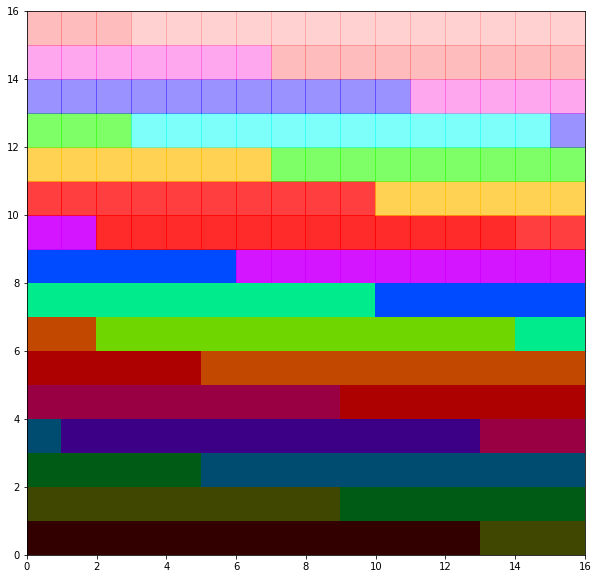

In [41]:
N = 16
H = np.arange(N*N).reshape([N,N])
fig = plt.figure(figsize=(10, 10))
ax = plt.pcolor(H, cmap=ListedColormap(generate_colormap(N)))

In [44]:
cmap=ListedColormap(generate_colormap(N))


AttributeError: 'ListedColormap' object has no attribute 'shape'

In [82]:
# ax.scatter(df.Both_AvgPrecision, df.Both_AvgRecall,c=df.Method.tolist())
# ax.legend()
def get_scatter(plotX,xlab,plotY,ylab,title,labels,xerrors,yerrors): 
    fig, ax = plt.subplots()
    colormap = ListedColormap(generate_colormap(20))
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(labels))]
    for i,c in enumerate(colorlist):
        x = plotX[i]
        y = plotY[i]
        l = labels[i]
        ye=yerrors[i]
        xe=xerrors[i]
        ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)
        ax.errorbar(x, y, yerr=ye, xerr=xe, fmt='o',c=c)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    return(fig,ax)

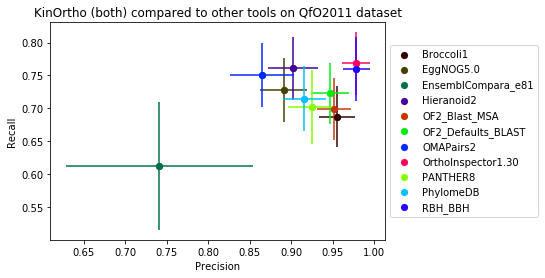

In [92]:
# plotX=df['Both_AvgPrecision']
# plotY=df['Both_AvgRecall']
# labels=df['Method']
# yerrors=df['Both_SERecall']
# xerrors=df['Both_SEPrecision']
get_scatter(df['Both_AvgPrecision'],"Precision",df['Both_AvgRecall'],"Recall",
            "KinOrtho (both) compared to other tools on QfO2011 dataset",
            df['Method'],df['Both_SEPrecision'],df['Both_SERecall'])
fig.savefig('both.svg')

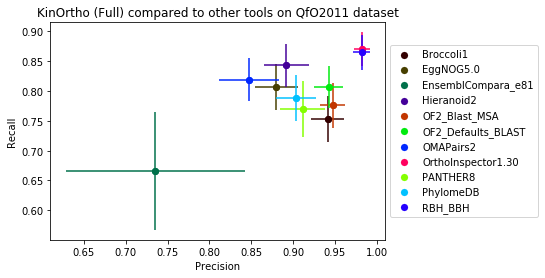

In [91]:
get_scatter(df['Full_AvgPrecision'],"Precision",df['Full_AvgRecall'],"Recall",
            "KinOrtho (Full) compared to other tools on QfO2011 dataset",
            df['Method'],df['Full_SEPrecision'],df['Full_SERecall'])
fig.savefig('full.svg')

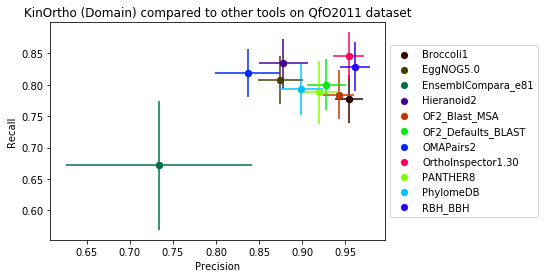

In [90]:
fig,ax=get_scatter(df['Dom_AvgPrecision'],"Precision",df['Dom_AvgRecall'],"Recall",
            "KinOrtho (Domain) compared to other tools on QfO2011 dataset",
            df['Method'],df['Dom_SEPrecision'],df['Dom_SERecall'])
fig.savefig('dom.svg')

In [79]:
df['Dom_SEPrecision']

0     0.016560
1     0.026230
2     0.107941
3     0.028465
4     0.018194
5     0.022727
6     0.037667
7     0.018009
8     0.024552
9     0.025708
10    0.017295
Name: Dom_SEPrecision, dtype: float64

In [80]:
df.Method

0              Broccoli1
1              EggNOG5.0
2     EnsemblCompara_e81
3             Hieranoid2
4          OF2_Blast_MSA
5     OF2_Defaults_BLAST
6              OMAPairs2
7     OrthoInspector1.30
8               PANTHER8
9              PhylomeDB
10               RBH_BBH
Name: Method, dtype: object

### Spike Disulfide plots

In [1]:
cd ~/Dropbox/kannan_lab/projects/viralSpike/analysis/spikeRbd_pdbDisulfides

/Users/rtaujale/Dropbox (Edison_Lab@UGA)/kannan_lab/projects/viralSpike/analysis/spikeRbd_pdbDisulfides


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import math
import seaborn as sns

In [15]:
df=pd.read_csv('disulfide_strains.csv.e5',sep='\t')
print(df.dtypes)
df2=pd.read_csv('pdb_disulfides/allPdbDisulfides.txt',sep='\t',header=None)
df2.head(2)

#Set                 object
PDB                  object
DisulfideDetails     object
AngleDirections      object
NumberInPdb           int64
Incidence           float64
DSE                 float64
DSERange             object
Distance            float64
DistanceRange        object
Designation          object
Details              object
dtype: object


,0
0,9.865225
1,28.963085


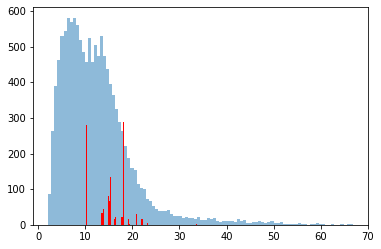

In [37]:
plt.hist(df2[0], bins = 100, alpha=0.5)
plt.hist(df['DSE'], bins = 100, color='red')
plt.savefig('both.svg')

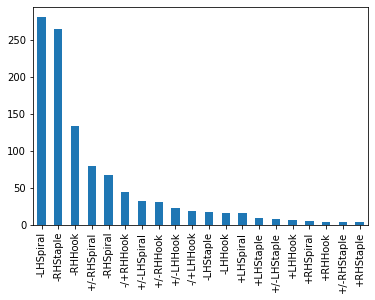

In [39]:
df['Designation'].value_counts().plot(kind='bar')
plt.savefig('bar.svg')

In [49]:
df2=df.groupby('Designation')
df3=df2.mean()
df3

,NumberInPdb,Incidence,DSE,Distance
Designation,,,,
+/-LHHook,249,3.62,17.8,6.13
+/-LHSpiral,599,8.71,13.6,6.08
+/-LHStaple,142,2.07,18.1,5.39
+/-RHHook,171,2.49,20.8,5.77
+/-RHSpiral,443,6.44,14.9,6.06
+/-RHStaple,84,1.22,19.4,5.25
+LHHook,111,1.61,18.1,6.00
+LHSpiral,90,1.31,19.3,6.38
+LHStaple,29,0.42,18.1,5.81
